In [16]:

from sklearn import datasets
import numpy as np

def readIris():
    iris= datasets.load_iris()
    X= iris.data[:, [0, 2]]
    y= iris.target
    y= np.where(y == 0, # if
                +1,                 # then
                -1)                 # else
    
    return X, y

In [17]:
X,y= readIris()
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [18]:
from sklearn.linear_model import Perceptron

ppn= Perceptron()#n_iter= 40, eta0= 0.1, random_state= 1)
ppn.fit(X, y)

C:\Users\renyu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

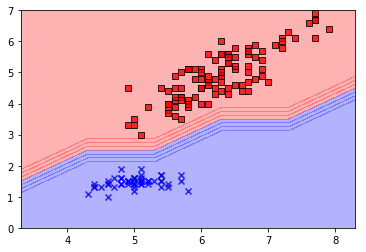

In [32]:
plot_decision_regions(X, y,
                      classifier= ppn, 
                      resolution=1)#,
                      #test_idx= range(105, 150))

In [28]:
import matplotlib.colors
def plot_decision_regions_old(X, y, 
                          classifier= None, 
                          resolution= 1, 
                          xylim= None):

    markers=  ('x',   'o')
    colors=   ('blue','red')
    colormap= matplotlib.colors.ListedColormap(colors)

    # 取得 資料集特徵向量 X，以及標籤 y
    # X= ... 
    # y= ... 

    # 先假設 尚無 classifier
    # classifier= None 

    # surface 網格點 (meshGrid) 之解析度
    ### resolution= 1 # .1

    # 設定 類別標記 圖示標記 和 顏色 之 對應
    # setup marker generator and color map

    # 以本題而言，  '-1', '+1' ==> index= [0, 1] ==> ['x', 'o'] ==> ['blue', 'red']
    uniqueY= np.unique(y) # == [-1, +1]
    # np.unique(y) Returns the sorted unique elements of an array.

    # plot samples with labels

    for i, lb in enumerate(uniqueY):

        x0= X[y == lb, 0] 
        x1= X[y == lb, 1]

        plt.scatter(x= x0, 
                    y= x1, 
                    label= lb,
                    alpha= .9, 
                    c=      colors[i],
                    marker= markers[i], 
                    edgecolor='black')

    #plt.xlim(x0_min, x0_max)
    #plt.ylim(x1_min, x1_max)
    #plt.show()

    # plot the decision surface

    # 橫坐標 x0, 縱座標 x1 之最大與最小值
    if xylim == None:
        x0_min= X[:, 0].min() - 1
        x0_max= X[:, 0].max() + resolution
        x1_min= X[:, 1].min() - 1
        x1_max= X[:, 1].max() + resolution
        
    elif isinstance(xylim,(int,float)):
        x0_min= x1_min = -abs(xylim)
        x0_max= x1_max = +abs(xylim) + resolution
    
    else:
        x0_min= x1_min = -10
        x0_max= x1_max = +10 + resolution
    

    #製造所有範圍內的「網格點」(meshGrid)
    xx0, xx1= np.meshgrid(np.arange(x0_min, x0_max, resolution),
                          np.arange(x1_min, x1_max, resolution))

    if classifier == None:
        
        # 沒有 classifier 時， 
        # 先用一條不等式來二分全平面 (+1/-1)        
        # z(x,y) = x + y - 10
        # z(x,y) <= 0  ==> u= +1
         
        #z=  xx0.ravel() + xx1.ravel() - 10
        #z= -xx0.ravel() - xx1.ravel() + 10
        z=  xx0.ravel() + xx1.ravel() - 1

        u= (z<=0)    # True / False
        u= u*2-1     # True ==> +1 / False ==> -1
        Z= np.array(u).T
    else:
        # 若有 classfier，可用它 對所有網格點做 predict (工程浩大喔！) 
        u= np.array([xx0.ravel(), xx1.ravel()])
        Z= classifier.predict(u.T) #.T


    Z= Z.reshape(xx0.shape)

    # plt.contourf(xx0, xx1, Z, alpha= .1, cmap= colormap)
    # plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)

    plt.pcolormesh(xx0, xx1, Z, alpha= .1, cmap= colormap)

    plt.xlim(x0_min, x0_max)
    plt.ylim(x1_min, x1_max)
    plt.show()


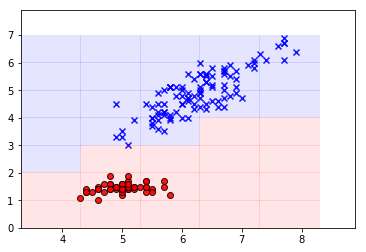

In [33]:
plot_decision_regions_old(X, y,
                      classifier= ppn, 
                      resolution=1)#,
                      #test_idx= range(105, 150))